In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#total ligne 423768
file_path = "C:/Users/PC HP 1/Desktop/2025-03-21/old_data/MONTHLY_AGGREGATION_SAMPLE (2).csv"
df = pd.read_csv(file_path)

# Preview the dataset
print("Dataset Overview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

Dataset Overview:
   period_id  subscriber_id                            msisdn  \
0     202407     2178984450  ce6672f53b0ea54782d24a792161fa7f   
1     202407     2178617545  c28f825e14b3c23be6c8048b55fc057d   
2     202407       13887273  f3d47134ed2db94d3b25a56a561c5794   
3     202407     2153229831  f1b948fea63047e738935730a9ea5451   
4     202407     2135934870  01cb9dec808df5e0dc90eda6ef3fd9f9   

   recharge_amount  number_of_recharges  number_of_sms_onnet  \
0              0.0                    0                    0   
1              0.0                    0                    1   
2              0.0                    0                    0   
3              0.0                    0                    0   
4              0.0                    0                    0   

   number_of_sms_offnet  number_of_sms_international  mou_onnet  \
0                     0                            0        0.0   
1                     0                            0        0.0   
2    

In [17]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
period_id                              0
subscriber_id                          0
msisdn                                 0
recharge_amount                        0
number_of_recharges                    0
number_of_sms_onnet                    0
number_of_sms_offnet                   0
number_of_sms_international            0
mou_onnet                              0
mou_offnet_mobile                      0
mou_offnet_fix                         0
mou_international                      0
bonus_on_consumption_revenue           0
bonus_on_refill_revenue                0
bonus_on_refill_flash_revenue          0
number_of_reactivations                1
consumption_revenue                    0
arpu_out_without_bonus                 0
incoming_revenue                       0
data_trafic_volume                876611
total_voice_revenu_amount         863851
total_data_revenu_amount         1059457
device_type                        24166
flag_smartphone                    24166

In [18]:
import numpy as np

# 1. Impute negligible missing numeric with median
df['number_of_reactivations'].fillna(df['number_of_reactivations'].median(), inplace=True)

# 2. Create missing flags and fill heavy missing usage/revenue with 0
usage_revenue_cols = ['data_trafic_volume', 'total_voice_revenu_amount', 'total_data_revenu_amount']
for col in usage_revenue_cols:
    df[col + '_missing_flag'] = df[col].isnull().astype(int)
    df[col].fillna(0, inplace=True)

# 3. Impute categorical columns with mode
for col in ['device_type', 'flag_smartphone']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# 4. Replace negative values in key numeric columns with 0
numeric_cols_to_check = ['consumption_revenue', 'total_data_revenu_amount', 'total_voice_revenu_amount']
for col in numeric_cols_to_check:
    df.loc[df[col] < 0, col] = 0

# 5. Verify no missing values remain in critical columns
print(df[usage_revenue_cols + ['number_of_reactivations', 'device_type', 'flag_smartphone']].isnull().sum())

data_trafic_volume           0
total_voice_revenu_amount    0
total_data_revenu_amount     0
number_of_reactivations      0
device_type                  0
flag_smartphone              0
dtype: int64


In [19]:
# Preview the dataset
print("Dataset Overview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

Dataset Overview:
   period_id  subscriber_id                            msisdn  \
0     202407     2178984450  ce6672f53b0ea54782d24a792161fa7f   
1     202407     2178617545  c28f825e14b3c23be6c8048b55fc057d   
2     202407       13887273  f3d47134ed2db94d3b25a56a561c5794   
3     202407     2153229831  f1b948fea63047e738935730a9ea5451   
4     202407     2135934870  01cb9dec808df5e0dc90eda6ef3fd9f9   

   recharge_amount  number_of_recharges  number_of_sms_onnet  \
0              0.0                    0                    0   
1              0.0                    0                    1   
2              0.0                    0                    0   
3              0.0                    0                    0   
4              0.0                    0                    0   

   number_of_sms_offnet  number_of_sms_international  mou_onnet  \
0                     0                            0        0.0   
1                     0                            0        0.0   
2    

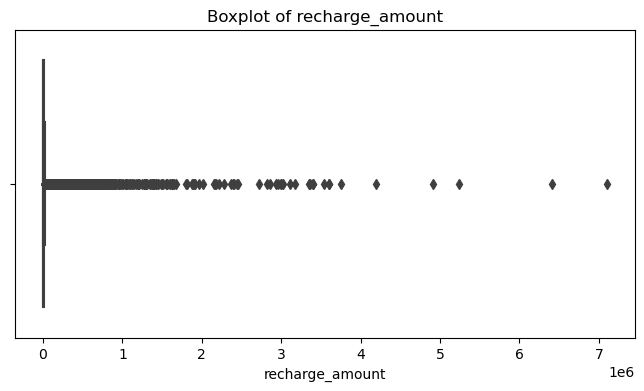

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.boxplot(x=df['recharge_amount'])
plt.title('Boxplot of recharge_amount')
plt.show()


In [21]:
def detect_outliers_iqr(data, cols):
    outlier_indices = dict()
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)]
        outlier_indices[col] = outliers.index.tolist()
        print(f"{col}: {len(outliers)} outliers")
    return outlier_indices

numerical_cols = ['recharge_amount', 'number_of_recharges', 'number_of_sms_onnet',
                  'mou_onnet', 'data_trafic_volume', 'total_voice_revenu_amount',
                  'total_data_revenu_amount', 'consumption_revenue']

outliers = detect_outliers_iqr(df, numerical_cols)

recharge_amount: 290469 outliers
number_of_recharges: 294159 outliers
number_of_sms_onnet: 342901 outliers
mou_onnet: 344670 outliers
data_trafic_volume: 496735 outliers
total_voice_revenu_amount: 262060 outliers
total_data_revenu_amount: 457801 outliers
consumption_revenue: 374396 outliers


In [22]:
import pandas as pd
import numpy as np

# List of numeric columns to handle outliers
numeric_cols = [
    'recharge_amount', 'number_of_recharges', 'number_of_sms_onnet',
    'number_of_sms_offnet', 'number_of_sms_international', 'mou_onnet',
    'mou_offnet_mobile', 'mou_offnet_fix', 'mou_international',
    'bonus_on_consumption_revenue', 'bonus_on_refill_revenue', 'bonus_on_refill_flash_revenue',
    'number_of_reactivations', 'consumption_revenue', 'arpu_out_without_bonus',
    'incoming_revenue', 'data_trafic_volume', 'total_voice_revenu_amount', 'total_data_revenu_amount'
]

# Cap outliers using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num_capped_lower = (df[col] < lower_bound).sum()
    num_capped_upper = (df[col] > upper_bound).sum()
    
    # Cap values
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    print(f"{col}: capped {num_capped_lower} lower outliers and {num_capped_upper} upper outliers")

# Check dataset after capping
print("\nDescriptive statistics after capping outliers:")
print(df[numeric_cols].describe())

recharge_amount: capped 0 lower outliers and 290469 upper outliers
number_of_recharges: capped 0 lower outliers and 294159 upper outliers
number_of_sms_onnet: capped 0 lower outliers and 342901 upper outliers
number_of_sms_offnet: capped 0 lower outliers and 452775 upper outliers
number_of_sms_international: capped 0 lower outliers and 36958 upper outliers
mou_onnet: capped 0 lower outliers and 344670 upper outliers
mou_offnet_mobile: capped 0 lower outliers and 342440 upper outliers
mou_offnet_fix: capped 0 lower outliers and 336422 upper outliers
mou_international: capped 0 lower outliers and 41690 upper outliers
bonus_on_consumption_revenue: capped 0 lower outliers and 17564 upper outliers
bonus_on_refill_revenue: capped 0 lower outliers and 625198 upper outliers
bonus_on_refill_flash_revenue: capped 0 lower outliers and 137497 upper outliers
number_of_reactivations: capped 0 lower outliers and 166866 upper outliers
consumption_revenue: capped 0 lower outliers and 374396 upper outli

In [23]:
# Preview the dataset
print("Dataset Overview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

Dataset Overview:
   period_id  subscriber_id                            msisdn  \
0     202407     2178984450  ce6672f53b0ea54782d24a792161fa7f   
1     202407     2178617545  c28f825e14b3c23be6c8048b55fc057d   
2     202407       13887273  f3d47134ed2db94d3b25a56a561c5794   
3     202407     2153229831  f1b948fea63047e738935730a9ea5451   
4     202407     2135934870  01cb9dec808df5e0dc90eda6ef3fd9f9   

   recharge_amount  number_of_recharges  number_of_sms_onnet  \
0              0.0                  0.0                  0.0   
1              0.0                  0.0                  1.0   
2              0.0                  0.0                  0.0   
3              0.0                  0.0                  0.0   
4              0.0                  0.0                  0.0   

   number_of_sms_offnet  number_of_sms_international  mou_onnet  \
0                   0.0                          0.0        0.0   
1                   0.0                          0.0        0.0   
2    

In [24]:
# Pour chaque colonne numérique, on calcule la moyenne par subscriber_id
for col in numeric_cols:
    df[col + '_moyen'] = df.groupby('subscriber_id')[col].transform('mean')

# Vérification
print(df[['subscriber_id'] + [c + '_moyen' for c in numeric_cols]].head())

   subscriber_id  recharge_amount_moyen  number_of_recharges_moyen  \
0     2178984450               0.000000                   0.000000   
1     2178617545            4142.857143                   4.142857   
2       13887273               0.000000                   0.000000   
3     2153229831               0.000000                   0.000000   
4     2135934870               0.000000                   0.000000   

   number_of_sms_onnet_moyen  number_of_sms_offnet_moyen  \
0                        0.0                         0.0   
1                        7.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   number_of_sms_international_moyen  mou_onnet_moyen  \
0                                0.0         0.000000   
1                                0.0      1191.428571   
2                                0.0         0.

In [25]:
# Supprimer les anciennes colonnes numériques et la colonne periode
cols_to_drop = numeric_cols + ['period_id']  # on ajoute 'periode' aussi

df = df.drop(columns=cols_to_drop, errors='ignore')

print("Colonnes restantes :", df.columns)

Colonnes restantes : Index(['subscriber_id', 'msisdn', 'device_type', 'flag_smartphone',
       'data_trafic_volume_missing_flag',
       'total_voice_revenu_amount_missing_flag',
       'total_data_revenu_amount_missing_flag', 'recharge_amount_moyen',
       'number_of_recharges_moyen', 'number_of_sms_onnet_moyen',
       'number_of_sms_offnet_moyen', 'number_of_sms_international_moyen',
       'mou_onnet_moyen', 'mou_offnet_mobile_moyen', 'mou_offnet_fix_moyen',
       'mou_international_moyen', 'bonus_on_consumption_revenue_moyen',
       'bonus_on_refill_revenue_moyen', 'bonus_on_refill_flash_revenue_moyen',
       'number_of_reactivations_moyen', 'consumption_revenue_moyen',
       'arpu_out_without_bonus_moyen', 'incoming_revenue_moyen',
       'data_trafic_volume_moyen', 'total_voice_revenu_amount_moyen',
       'total_data_revenu_amount_moyen'],
      dtype='object')


In [26]:
#save after changes 
df.to_csv('cleaned_MONTHLY_AGGREGATION_SAMPLE.csv', index=False)